Data Description: The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Domain: Banking

Context: This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

Attribute Information:
•	ID : Customer ID
•	Age : Customer's age in completed years
•	Experience : #years of professional experience
•	Income : Annual income of the customer ($ 000)
•	zipCode : Home Address ZIP code
•	Family : Family size of the customer
•	CCAvg : Average spending on credit cards per month ($000)
•	Education : Education Level.
        a.Undergrad
        b.Graduate
        c.Advanced/Professional
•	Mortgage : Value of house mortgage if any($000)
•	Personal Loan : Did this customer accept the personal loan offered in the last campaign?
•	Securities Account : Does the customer have a securities account with the bank?
•	CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
•	Online : Does the customer use internet banking facilities?
•	Credit card : Does the customer use a credit card issued by Thera Bank?


Learning Outcomes:
•	Exploratory Data Analysis
•	Preparing the data to train a model
•	Training and making predictions using a classification model
•	Model evaluation

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as sci
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from scipy.stats import zscore

In [3]:
#load data from csv
customer_data=pd.read_csv("Bank_Personal_loan_Modelling.csv")
#shape of data
customer_data.shape

(5000, 14)

In [4]:
customer_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
print('Since the ID column is just an indicator of the data and not useful, we will drop it.')
customer_data.drop('ID',axis=1,inplace=True)
print('The ZIP code column is treated by python as an integer, even though it should be considered as a categorical variable.If we were to convert it to categorical variable, there would be a lot of categories since each zip code is different.Since ZIP code cannot affect the target variable(defaulters taking personal loans),creating so many categories does not make sense. Hence dropping the column.')
customer_data.drop('ZIP Code',axis=1,inplace=True)

Since the ID column is just an indicator of the data and not useful, we will drop it.
The ZIP code column is treated by python as an integer, even though it should be considered as a categorical variable.If we were to convert it to categorical variable, there would be a lot of categories since each zip code is different.Since ZIP code cannot affect the target variable(defaulters taking personal loans),creating so many categories does not make sense. Hence dropping the column.


In [7]:
#Checking the presence of missing values
customer_data.isna().apply(pd.value_counts)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [8]:
print('This means that there are no missing values in the data.')

This means that there are no missing values in the data.


In [9]:
customer_data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
#identifying and removing negative values from Experience and replacing with NaN because experience cannot have negative values.
customer_data[customer_data['Experience'] == -1]['Experience'].count()
customer_data['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )

In [11]:
customer_data[customer_data['Experience'] == -2]['Experience'].count()
customer_data['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )

In [12]:
customer_data[customer_data['Experience'] == -2]['Experience'].count()
customer_data['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )

In [13]:
#replacing the NaN values with medians for ease of calculation
customer_data['Experience'].fillna(customer_data['Experience'].median(),inplace=True)
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


2. Let us study the data distribution in each attribute

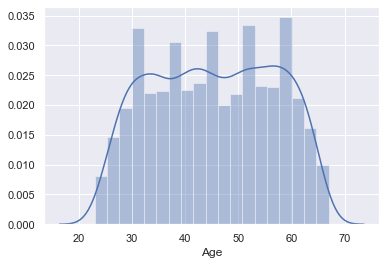

In [14]:
sns.distplot(customer_data['Age'])

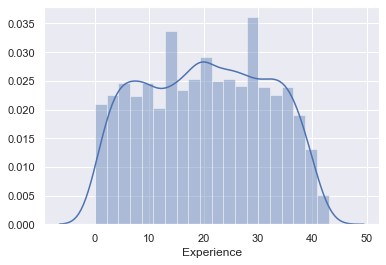

In [15]:
sns.distplot(customer_data['Experience'])

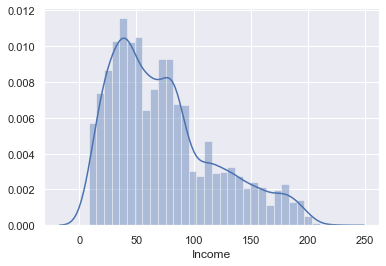

In [16]:
sns.distplot(customer_data['Income'])

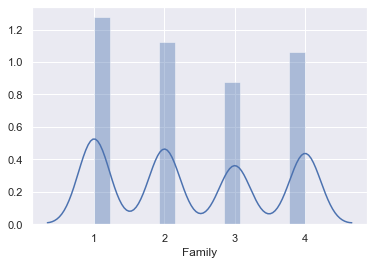

In [17]:
sns.distplot(customer_data['Family'])

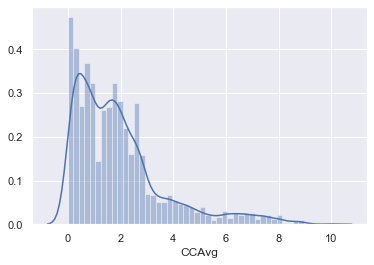

In [18]:
sns.distplot(customer_data['CCAvg'])

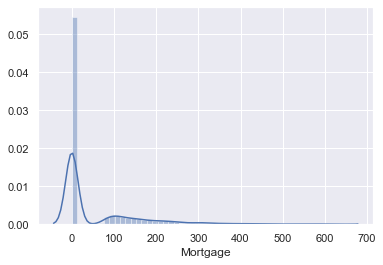

In [19]:
sns.distplot(customer_data['Mortgage'])

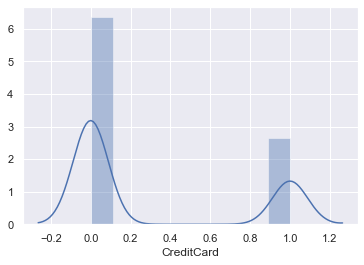

In [20]:
sns.distplot(customer_data['CreditCard'])

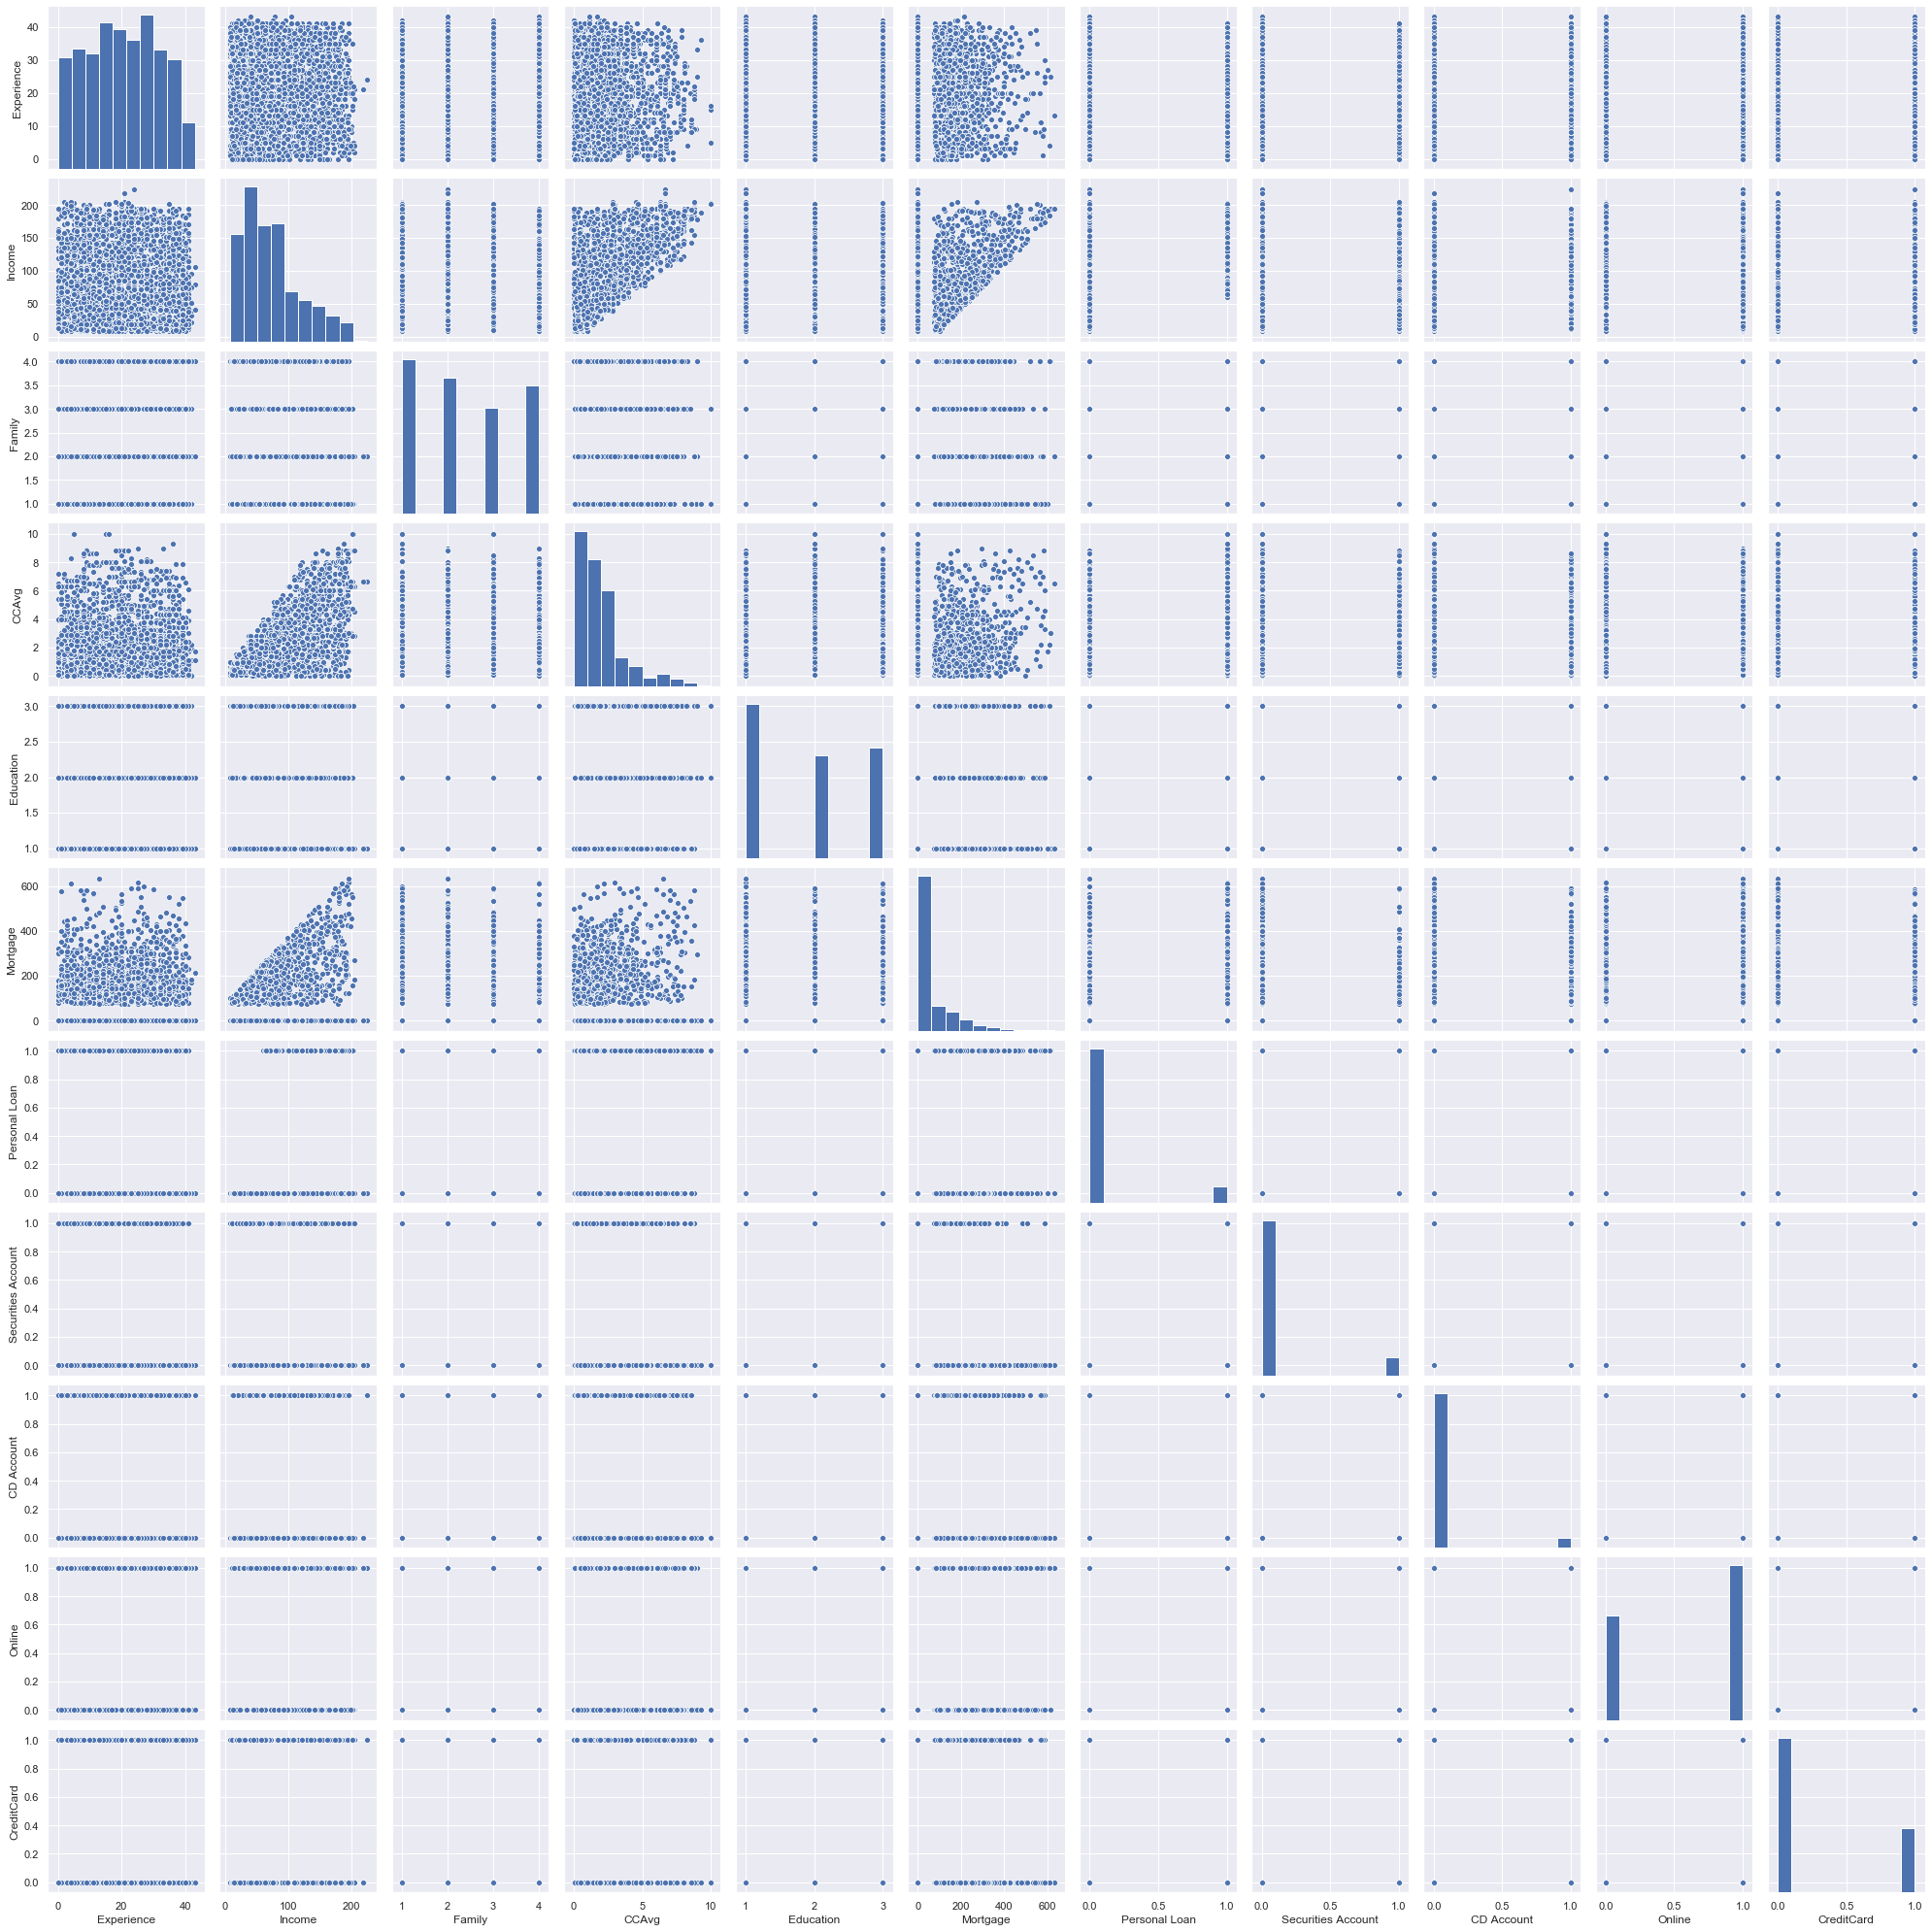

In [31]:
#finding the data distribution using a pairplot
sns.pairplot(customer_data.iloc[:,1:])

#Summary
1. ID : Since the ID column is just an indicator of the data and not useful, it has been dropped.

2. Age : From the pairplot we see that age follows more or less a normal distribution.

3. Experience : Experience increases linearly with age.It also follows a normal distribution.

4. Income : There is more data present for customers with less income, since the distribution of Income is left skewed.

5. zipCode : The ZIP code column is treated by python as an integer, even though it should be considered as a categorical variable.If we were to convert it to categorical variable, there would be a lot of categories since each zip code is different.Since ZIP code cannot affect the target variable(defaulters taking personal loans),creating so many categories does not make sense. Hence dropping the column.

6. Family : From the distribution we see that there are more customers which have only one member in their family.

7. CCAvg : The CCAvg distributions is also highly skewed towards the left, This means that most of the customers in the dataset pay less than $1000.

8. Education : The dataset contains more customers that are undergraduates.

9. Mortgage : The distribution is highly skewed towards the left which means most customers in the dataset have at least one      mortgage, while a minimal number of them have more than one.

10. Personal Loan : This is the target variable.A very less number of customers from dataset have taken a personal loan last year.

11. Securities Account : Majority of customers in the dataset have a security account.

12. CD Account : Majority of customers in the dataset have a CD account.It has a very weak but positive correlation with           Personal Loan, Security Account and Credit Card variables.

13. Online : Majority of customers in the dataset use online banking.

14. Credit card : More number of customers in the dataset use a credit card issued by Thera Bank.

3. Fetching the target column distribution.

The target variable in this dataset is Personal Loan.

In [22]:
customer_data["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

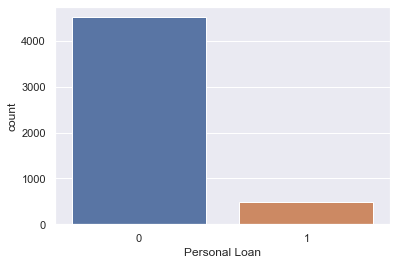

In [23]:
#From the above correlation matrix, we see that Personal Loan has a moderate correlation with Personal Loan and weak correlations with Scurity Account and Credit Card variables.
sns.countplot(customer_data["Personal Loan"])

In [24]:
print('From the above barplot we see that there are 4520 customers who have not accepted a personal loan offered in the last campaign and 480 customers have accepted a personal loan offered in the last campaign, which is a very low value.')

From the above barplot we see that there are 4520 customers who have not accepted a personal loan offered in the last campaign and 480 customers have accepted a personal loan offered in the last campaign, which is a very low value.


In [25]:
#Relationship between columns
customer_data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977182,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977182,1.000000,-0.049046,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.055269,-0.049046,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045528,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048718,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018074,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013365,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014013,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000465,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005526,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


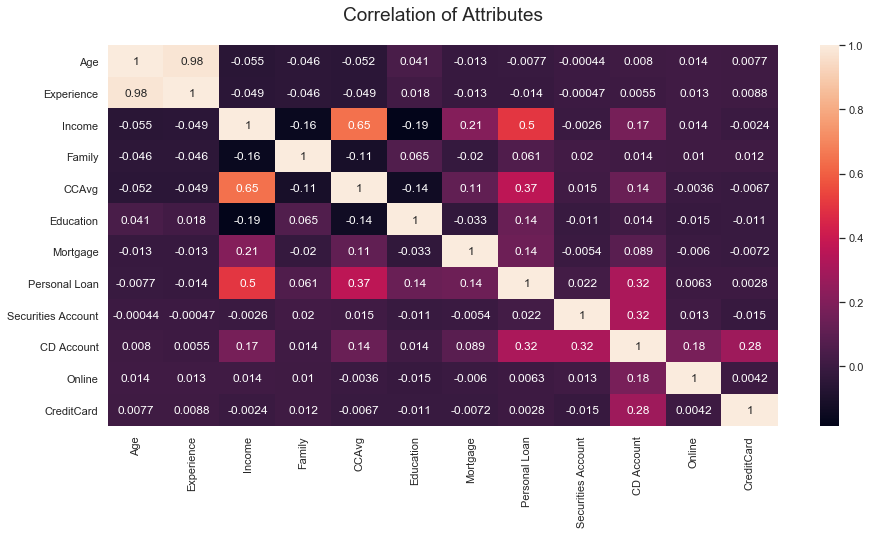

In [26]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(customer_data.corr(),annot=True)

In [26]:
print('From the heatmap we see that Personal Loan has a positive correlation with Income, CCAvg,Mortgage,CD Account and a negative correlation with Education, specifically undergrads.')

From the heatmap we see that Personal Loan has a positive correlation with Income, CCAvg,Mortgage,CD Account and a negative correlation with Education, specifically undergrads.


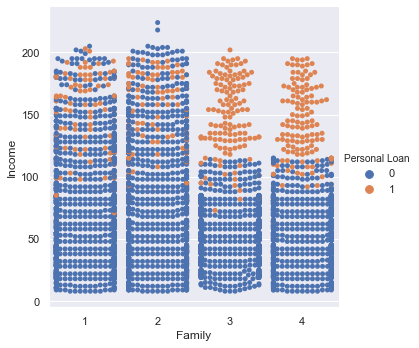

In [27]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = customer_data, kind='swarm')

In [28]:
print('From the above swarm plot we see that families with 3 or 4 members  and an income of more than $100,000 tend to have taken personal loan.')

From the above swarm plot we see that families with 3 or 4 members  and an income of more than $100,000 tend to have taken personal loan.


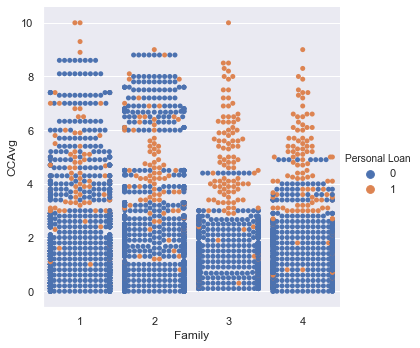

In [29]:
sns.catplot(x='Family', y='CCAvg', hue='Personal Loan', data = customer_data, kind='swarm')

In [30]:
print('From the above swarm plot we see that families with 3 or 4 members  and having a CCAvg of more than $3000 tend to have taken personal loan.')

From the above swarm plot we see that families with 3 or 4 members  and having a CCAvg of more than $3000 tend to have taken personal loan.


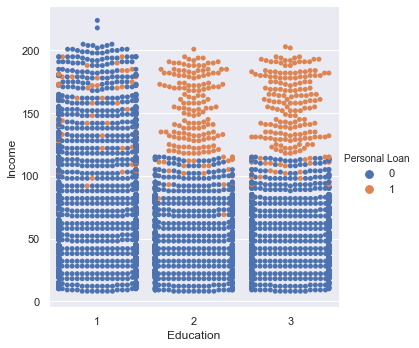

In [31]:
sns.catplot(x='Education', y='Income', hue='Personal Loan', data = customer_data, kind='swarm')

In [32]:
print('From the above swarm plots we see that customers with education of graduate or more and income of more than $100,000 tend to have taken personal loan.')

From the above swarm plots we see that customers with education of graduate or more and income of more than $100,000 tend to have taken personal loan.


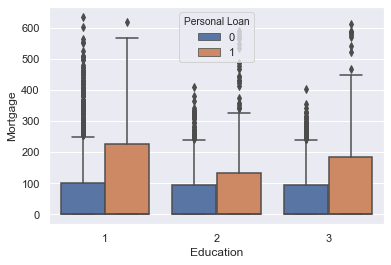

In [33]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=customer_data)

In [ ]:
sns.boxplot(x="Education_Graduate", y='Mortgage', hue="Personal Loan", data=customer_data)

In [ ]:
sns.boxplot(x="Education_Advanced/Professional", y='Mortgage', hue="Personal Loan", data=customer_data)

In [34]:
print('From the above box plots we see that customers who are undergraduates and do not have a personal loan tend to have higher mortgages. ')

From the above box plots we see that customers who are undergraduates and do not have a personal loan tend to have higher mortgages. 


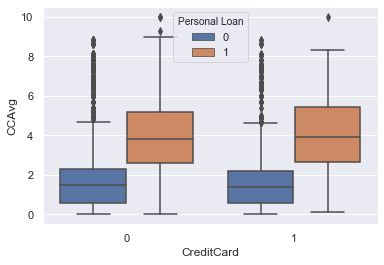

In [35]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=customer_data)

In [36]:
print('From the above box plots we see that customers who have credit cards and spend more on Credit Card bills  tend to have taken personal loan.')

From the above box plots we see that customers who have credit cards and spend more on Credit Card bills  tend to have taken personal loan.


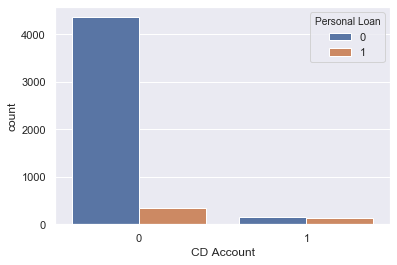

In [37]:
sns.countplot(x="CD Account", data=customer_data ,hue="Personal Loan")

In [38]:
print('From the above plot we see that few customers who do not have credit cards take personal loan but all customers who have credit card have taken a personal loan.')

From the above plot we see that few customers who do not have credit cards take personal loan but all customers who have credit card have taken a personal loan.


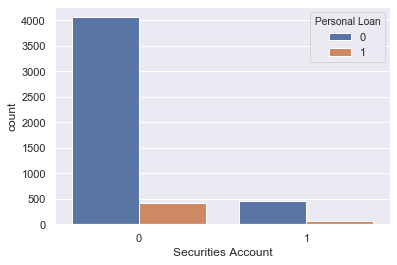

In [41]:
sns.countplot(x="Securities Account", data=customer_data ,hue="Personal Loan")

In [42]:
print('From the above plot we see that majority of customers who do not have personal loans have security account.')

From the above plot we see that majority of customers who do not have personal loans have security account.


4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [32]:
#We are splitting the data into 70% and 30% respectively for training and test.
X = customer_data.drop(['Personal Loan'], axis = 1)
y = customer_data['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#Replacing 0 and 1 with the z-score
print('Number of 0s in Train dataset : ', y_train.value_counts()[0])
print('Number of 1s in Train dataset : ', y_train.value_counts()[1])
print('----------------')
print('Number of 0s in Test dataset : ', y_test.value_counts()[0])
print('Number of 1s in Test dataset : ', y_test.value_counts()[1])

X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

Number of 0s in Train dataset :  3169
Number of 1s in Train dataset :  331
----------------
Number of 0s in Test dataset :  1351
Number of 1s in Test dataset :  149


In [33]:
# Function to print the different metrics such as confusion matrix, roc, accuracy, precision, recall etc

def printModel(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('Train set accuracy = ', metrics.accuracy_score(y_train, y_train_pred))
    print('Test set accuracy = ', metrics.accuracy_score(y_test, y_test_pred))
    print(metrics.classification_report(y_test, y_test_pred))

    cm = metrics.confusion_matrix(y_test, y_test_pred)
    cm = pd.DataFrame(cm, columns=['Predicted No Loan', 'Predicted Loan'], index=['Truth No Loan', 'Truth Loan'])
    sns.heatmap(cm, annot=True, fmt='g', cbar=False)
    plt.show()

    y_test_proba = model.predict_proba(X_test)
    y_test_proba = y_test_proba[:,1]
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # calculate scores
    ns_auc = metrics.roc_auc_score(y_test, ns_probs)
    lr_auc = metrics.roc_auc_score(y_test, y_test_proba)
    # summarize scores
    print('ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, y_test_proba)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Model Skill')
    
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

Train set accuracy =  0.9531428571428572
Test set accuracy =  0.948
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.84      0.58      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



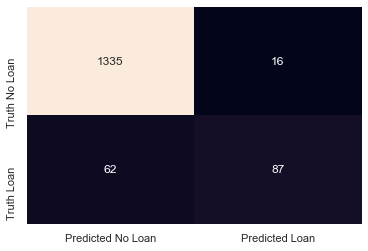

ROC AUC=0.953


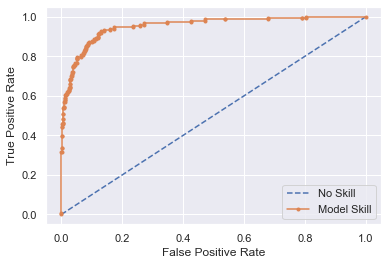

In [34]:
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train, y_train)
printModel(logistic_model, X_train, X_test, y_train, y_test)

b) Naive Bayes

Train set accuracy =  0.9531428571428572
Test set accuracy =  0.948
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.84      0.58      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



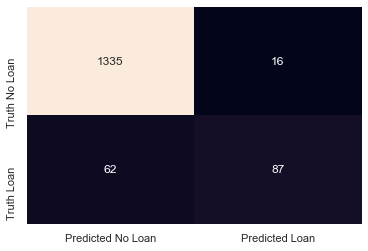

ROC AUC=0.953


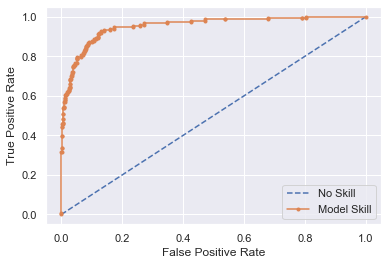

In [36]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)
printModel(logistic_model, X_train, X_test, y_train, y_test)

c) KNN

Train set accuracy =  1.0
Test set accuracy =  0.9533333333333334
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.92      0.58      0.71       149

    accuracy                           0.95      1500
   macro avg       0.94      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500



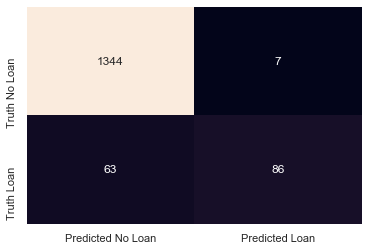

ROC AUC=0.915


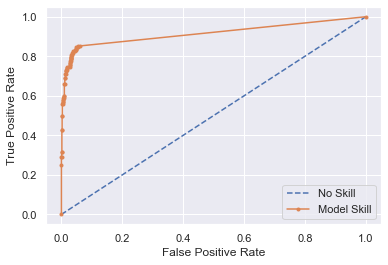

In [41]:
model = KNeighborsClassifier(n_neighbors=5, weights='distance')
model.fit(X_train, y_train)
printModel(model, X_train, X_test, y_train, y_test)

From the above, we can clearly see that Naive Bayes or Logistic model gives an accuracy of 95% .
Also the Type I(False Posssitive) and Type II(False Negative) errors are least in K-Nearest model.
The area in ROC curve for K-NN is 0.953 which is close to 1 which stats that Logistic/Naive Bayes is the best model.
Hence among the above three algorithm applied on the underline dataset, Logis would be the best choice to predict the customers who will accept the personal loan.